In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'/home/ibrahim/Desktop/internship_project/data/Price.csv')
data.head()

,Unnamed: 0,symbol,adjusted_close,date
0,0,LKMNH,6.45,2018-03-14
1,1,SUMAS,4.78,2018-03-15
2,2,ACSEL,2.69,2018-03-16
3,3,FROTO,62.70,2018-03-19
4,4,LKMNH,6.54,2018-03-20


In [3]:
datacl = data.drop("Unnamed: 0", axis=1)

In [4]:
pivotdata = data.pivot_table(values='adjusted_close',index='date',columns='symbol')
pivotdata = pivotdata['2002-01-01':]
pivotdata.index = pd.to_datetime(pivotdata.index)
returns = pivotdata.pct_change()

In [5]:
scores = returns
scores = scores.rolling('365D').std()
scores = scores.dropna(thresh=10,axis=0)

In [6]:
pivotdata = pivotdata.iloc[3:]

In [7]:
import returnbyfactors

In [8]:
result = returnbyfactors.analyze_by_score(pivotdata,scores)

In [9]:
result

,1dayreturn,3dayreturn,5dayreturn
index,,,
Group1,-0.000900,-0.001239,-0.001234
Group2,-0.000627,-0.000387,0.000164
Group3,-0.000599,-0.000325,0.000340
Group4,-0.000684,-0.000491,0.000035
Group5,0.002810,0.002442,0.000696


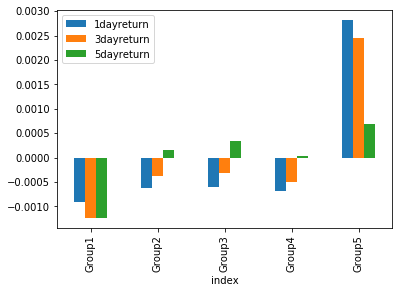

In [10]:
result.plot(kind='bar')